In [11]:
!pip install pandas

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
try:
    df_test = pd.read_excel('test.xlsx')
    df_train = pd.read_excel('train.xlsx')
    print("Файлы успешно загружены.")
except FileNotFoundError:
    print("Ошибка: Один или оба файла не найдены. Убедитесь, что файлы находятся в той же папке, что и блокнот.")
except Exception as e:
    print(f"Произошла ошибка: {e}")




Произошла ошибка: name 'pd' is not defined


In [14]:
print("Первые 5 строк файла test.xlsx:")
print(df_test.head())

print("\nИнформация о файле test.xlsx:")
print(df_test.info())

Первые 5 строк файла test.xlsx:
          dt  Цена на арматуру
0 2022-09-05             46000
1 2022-09-12             46000
2 2022-09-19             46000
3 2022-09-26             45500
4 2022-10-03             45500

Информация о файле test.xlsx:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                28 non-null     datetime64[ns]
 1   Цена на арматуру  28 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 580.0 bytes
None


In [15]:
print("Первые 5 строк файла train.xlsx:")
print(df_train.head())

print("\nИнформация о файле train.xlsx:")
print(df_train.info())

Первые 5 строк файла train.xlsx:
          dt  Цена на арматуру
0 2015-01-05             32900
1 2015-01-12             32500
2 2015-01-19             32000
3 2015-01-26             30700
4 2015-02-02             30300

Информация о файле train.xlsx:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB
None


In [1]:
train_df.describe()

NameError: name 'train_df' is not defined

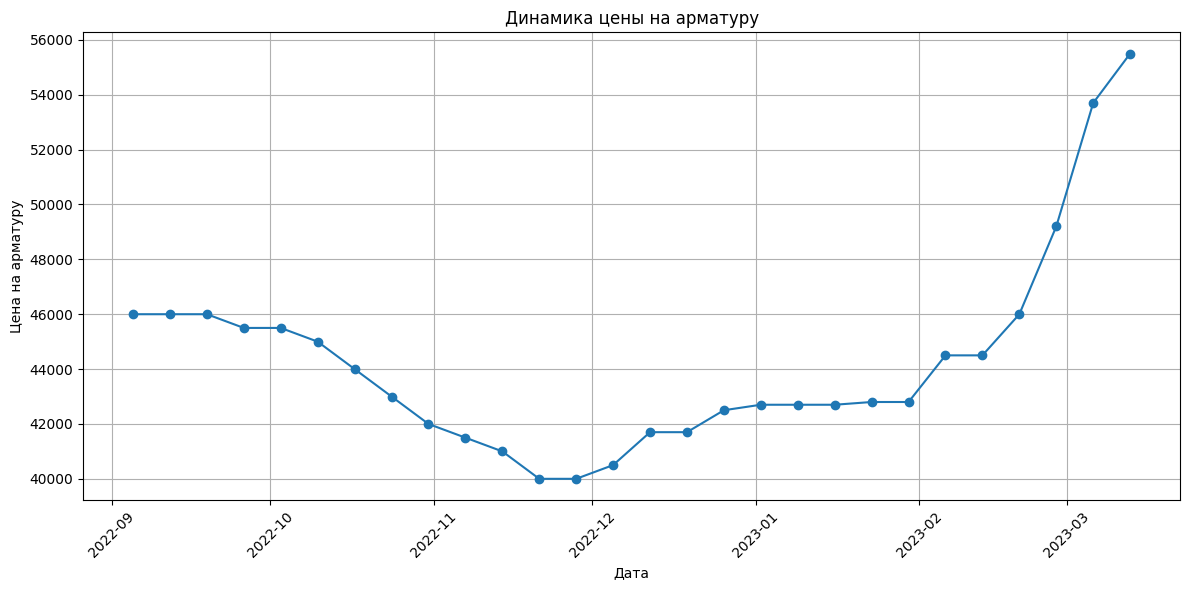

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Задаем размер графика
plt.plot(df_test['dt'], df_test['Цена на арматуру'], marker='o', linestyle='-')  # Строим график
plt.xlabel('Дата')  # Подпись оси X
plt.ylabel('Цена на арматуру')  # Подпись оси Y
plt.title('Динамика цены на арматуру')  # Заголовок графика
plt.grid(True)  # Включаем сетку
plt.xticks(rotation=45) # Поворачиваем подписи оси X для лучшей читаемости
plt.tight_layout()
plt.show()  # Показываем график

In [14]:
import pandas as pd

# Load the data into df_train.
try:
    df_train = pd.read_excel('train.xlsx')  # Replace 'train.xlsx' with your actual filename
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: train.xlsx not found. Please make sure the file is in the correct directory.")
    df_train = None #if load fails set to None

if df_train is not None:
    description = df_train.describe()
    print(description) # Print the descriptive statistics


Data loaded successfully.
                        dt  Цена на арматуру
count                  400        400.000000
mean   2018-11-01 12:00:00      39229.475000
min    2015-01-05 00:00:00      21000.000000
25%    2016-12-03 06:00:00      31075.000000
50%    2018-11-01 12:00:00      35450.000000
75%    2020-09-29 18:00:00      42000.000000
max    2022-08-29 00:00:00      79000.000000
std                    NaN      13407.979668


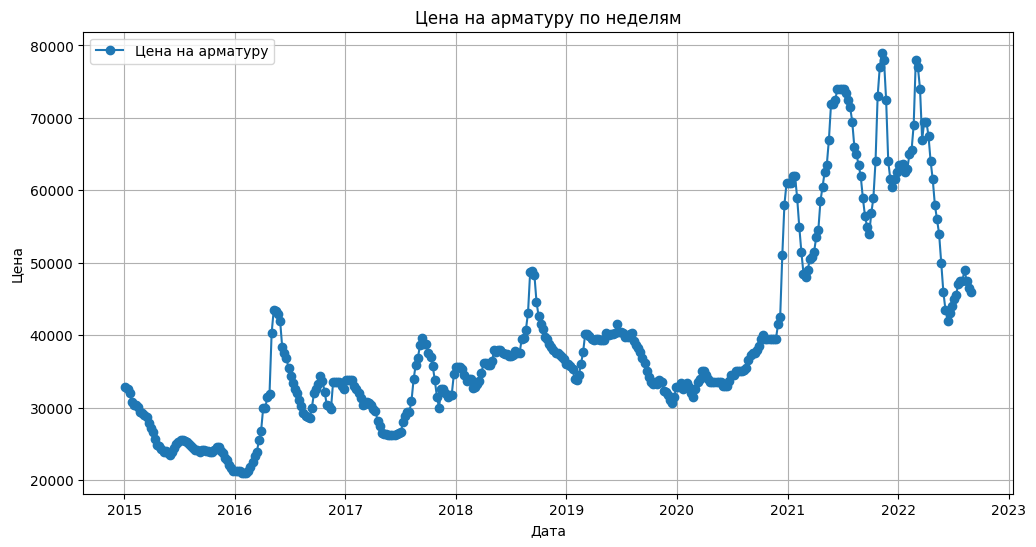

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df_train['dt'], df_train['Цена на арматуру'], label='Цена на арматуру', marker='o')
plt.title('Цена на арматуру по неделям')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid()
plt.show()

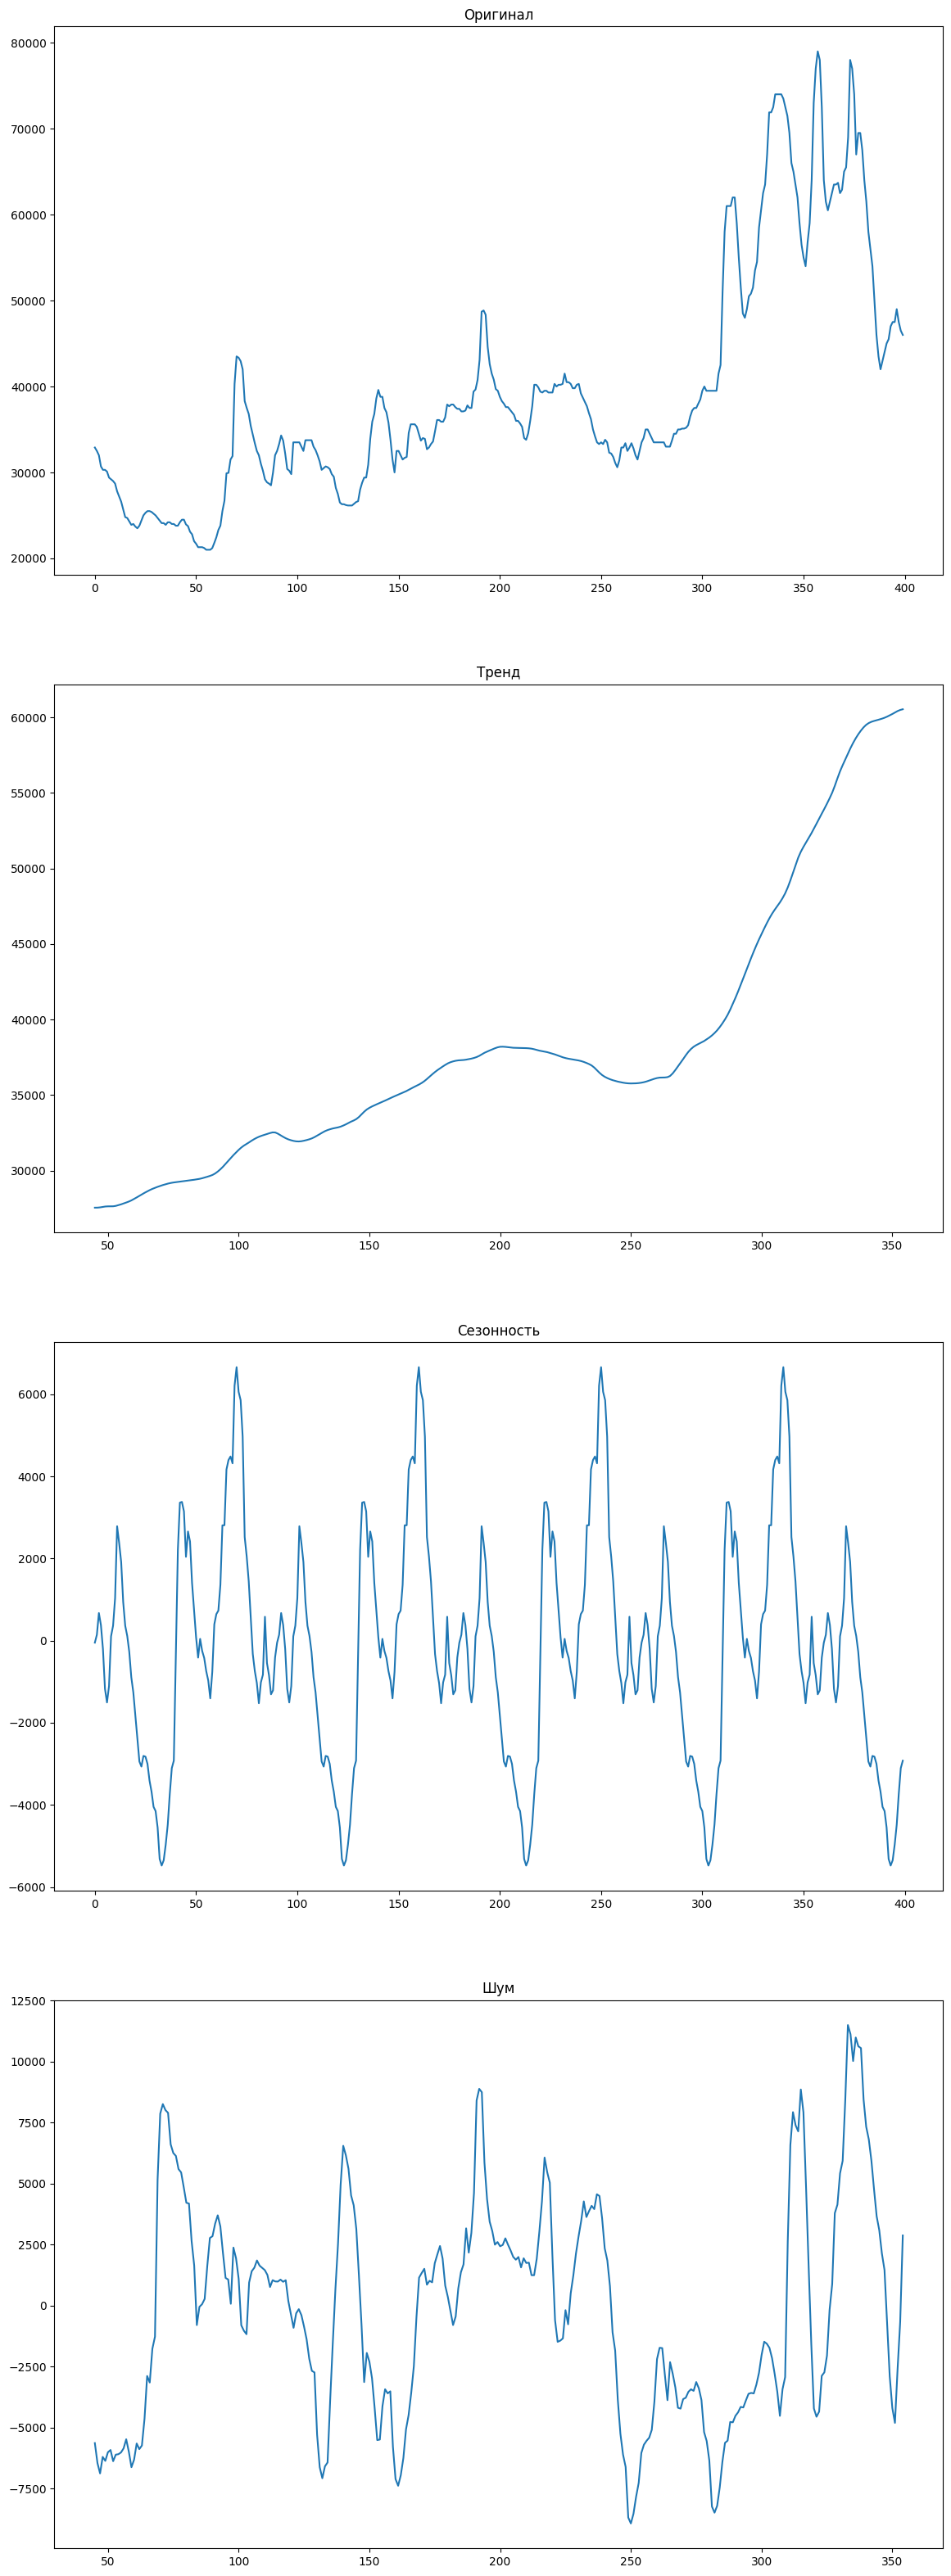

In [17]:
# Разложим ряд на компоненты и ответим: Есть ли у данного ряда тренд? Есть ли у данного ряда сезонность?
from statsmodels.tsa.seasonal import seasonal_decompose
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 40))
decompose = seasonal_decompose(df_train[['Цена на арматуру']], period=90)

ax[0].set_title('Оригинал')
ax[1].set_title('Тренд')
ax[2].set_title('Сезонность')
ax[3].set_title('Шум')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3]);

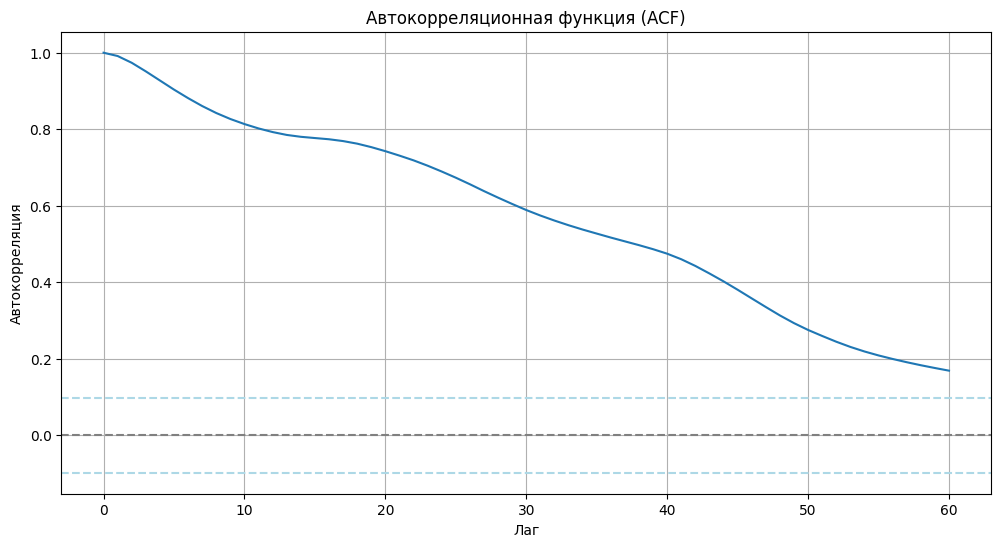

In [18]:
from statsmodels.tsa.stattools import acf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel("train.xlsx")

# Вычисление ACF
acf_values = acf(df['Цена на арматуру'], nlags=60)

# Визуализация ACF
plt.figure(figsize=(12, 6))
plt.plot(acf_values)
plt.xlabel("Лаг")
plt.ylabel("Автокорреляция")
plt.title("Автокорреляционная функция (ACF)")
plt.grid(True)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df['Цена на арматуру'])), linestyle='--', color='lightblue')
plt.axhline(y=-1.96/np.sqrt(len(df['Цена на арматуру'])), linestyle='--', color='lightblue')
plt.show()

In [17]:
common_columns = set(df_test.columns).intersection(df_train.columns)
print(f"Общие столбцы: {common_columns}")

Общие столбцы: {'Цена на арматуру', 'dt'}


In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split

# Загружаем файл train.xlsx
try:
    df_train = pd.read_excel('train.xlsx')
except FileNotFoundError:
    print("Файл train.xlsx не найден.")
    exit()  # Завершаем выполнение, если файл не найден
except Exception as e:
    print(f"Произошла ошибка при загрузке файла: {e}")
    exit()

# Разделяем данные на тренировочную и тестовую выборки
train_data, test_data = train_test_split(df_train, test_size=0.25, random_state=42, shuffle=True)

# Параметры:
# - test_size=0.25: 25% данных идет в тестовую выборку.
# - random_state=42: Фиксируем случайное разбиение для воспроизводимости результатов.
# - shuffle=True: Перемешиваем данные перед разбиением.

# Сохраняем в новые файлы с новыми именами, чтобы не запутаться
try:
    train_data.to_excel('train_new.xlsx', index=False)
    test_data.to_excel('test_new.xlsx', index=False)
    print("Файлы train_new.xlsx и test_new.xlsx успешно созданы.")
except Exception as e:
    print(f"Произошла ошибка при сохранении файлов: {e}")

Файлы train_new.xlsx и test_new.xlsx успешно созданы.
